# 목적

데이터를 crop / interpolation한 다음에 user / scene를 알아볼수 있는 파일명으로 각각 csv파일로 저장

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
from math import pi

In [68]:
def plot(*data, title=None, xlabel=None, ylabel=None):
    dd = []
    ls = []
    for d in data:
        if isinstance(d, str):
            ls.append(d)
        else:
            dd.append(d)
    
    plt.figure(figsize=(16, 4))
    for d in dd:
        plt.plot(d)
    plt.legend(ls)
    
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    
    plt.show()

In [3]:
def norm(data):
    return (data - data.min()) / (data.max() - data.min())

In [4]:
DATA_DIR = Path('org')

In [5]:
CSV_FILES = [pd.read_csv(f) for f in sorted(list(DATA_DIR.glob('*.csv')))]

In [6]:
CSV_FILES[0].columns

Index(['timestamp', 'biosignal_0', 'biosignal_1', 'biosignal_2', 'biosignal_3',
       'biosignal_4', 'biosignal_5', 'biosignal_6', 'biosignal_7',
       'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_vec_x',
       'angular_vec_y', 'angular_vec_z', 'magnetic_x', 'magnetic_y',
       'magnetic_z', 'input_orientation_x', 'input_orientation_y',
       'input_orientation_z', 'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll',
       'input_projection_left', 'input_projection_top',
       'input_projection_right', 'input_projection_bottom', 'prediction_time',
       'predicted_orientation_x', 'predicted_orientation_y',
       'predicted_orientation_z', 'predicted_orientation_w',
       'predicted_orientation_yaw', 'predicted_orientation_pitch',
       'predicted_orientation_roll', 'predicted_projection_left',
       'predicted_projection_top', 'predicted_projection_right',
       'predicted_projection_bottom'],
      d

In [7]:
COLUMNS = ['timestamp', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [8]:
CSV_FILES = [csv[COLUMNS] for csv in CSV_FILES]

In [51]:
for csv in CSV_FILES:
    csv.timestamp /= 705600

In [58]:
for csv in CSV_FILES:
    csv.input_orientation_yaw *= 180 / pi
    csv.input_orientation_pitch *= 180 / pi
    csv.input_orientation_roll *= 180 / pi

`705600000 = 1s`

그러므로 `705600 = 1ms`


In [59]:
csv

,timestamp,acceleration_x,acceleration_y,acceleration_z,input_orientation_yaw,input_orientation_pitch,input_orientation_roll
0,3.270936e+06,-0.069434,9.589070,-1.113338,-3.629473,7.595386,-1.410510
1,3.270954e+06,-0.069434,9.601042,-1.101366,-3.595889,7.475031,-1.411981
2,3.270969e+06,-0.064645,9.622590,-1.087001,-3.539358,7.446354,-1.346180
3,3.270986e+06,-0.045491,9.677659,-1.113338,-3.481707,7.329539,-1.311496
4,3.271003e+06,-0.035914,9.720756,-1.072635,-3.452480,7.273142,-1.294892
...,...,...,...,...,...,...,...
19845,3.853586e+06,-0.016760,9.761458,-0.529135,-1.018193,3.928019,-1.908800
19846,3.853605e+06,-0.131685,9.799767,-0.514769,-1.168380,3.917410,-1.962520
19847,3.853620e+06,-0.162811,9.818921,-0.495615,-1.254902,3.890114,-2.038934
19848,3.853637e+06,-0.284919,9.806950,-0.462095,-1.285986,3.847799,-2.102169


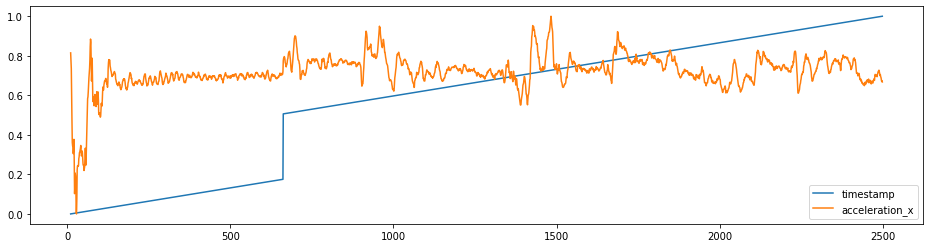

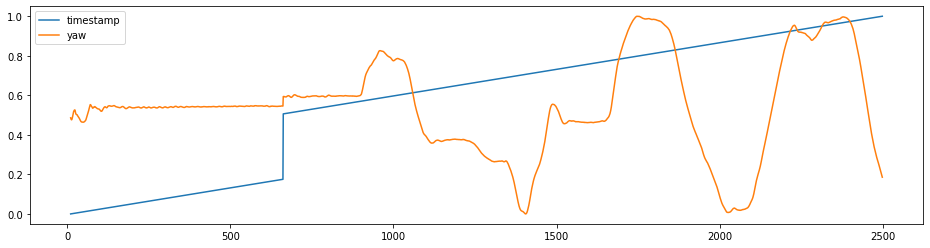

In [72]:
csv = CSV_FILES[2]
plot(norm(csv.timestamp[10:2500]), norm(csv.acceleration_x[10:2500]), 'timestamp', 'acceleration_x')
plot(norm(csv.timestamp[10:2500]), norm(csv.input_orientation_yaw[10:2500]), 'timestamp', 'yaw')

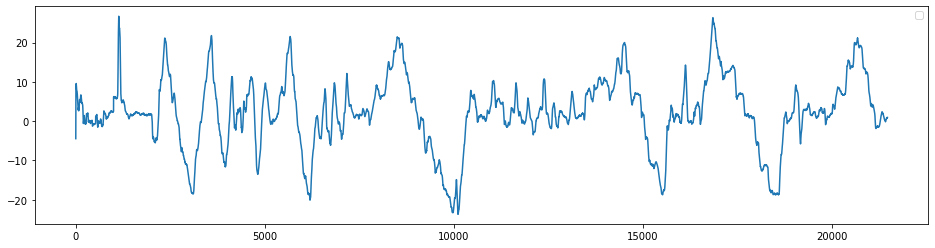

In [69]:
plot(csv.input_orientation_yaw)

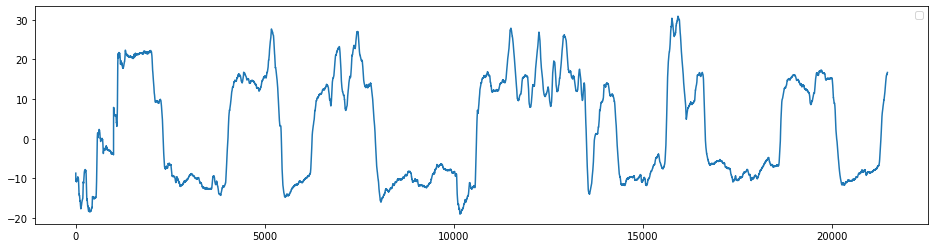

In [66]:
plot(csv.input_orientation_pitch)

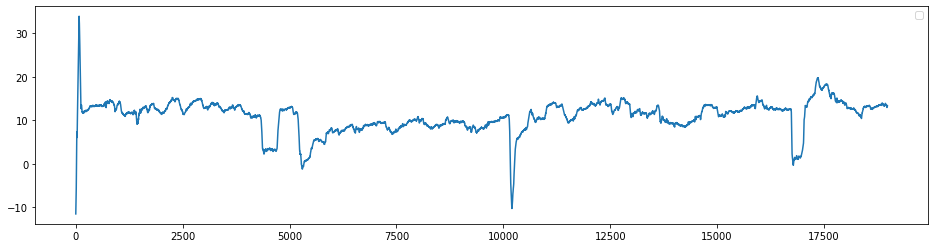

In [73]:
plot(csv.input_orientation_pitch)

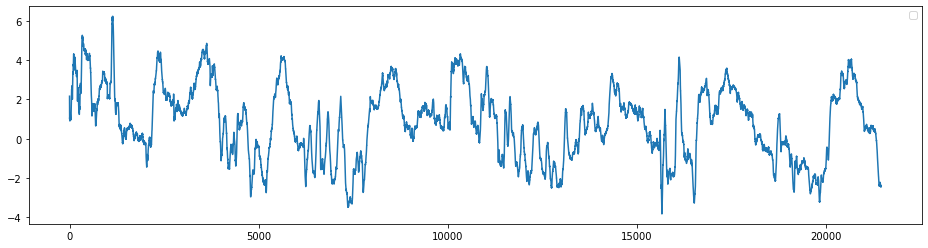

In [67]:
plot(csv.input_orientation_roll)